In [27]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import pickle


In [2]:
#Read csv into notebook
songs = pd.read_csv("songs.csv")
songs = songs.drop_duplicates(subset='id', keep='first')
songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,artist,hot_100
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,...,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus,1
1,0.347,0.378,8,-9.960,1,0.0354,0.8570,0.000000,0.1180,0.610,...,audio_features,5ReIs3aH4wfBjp93QOtWAl,spotify:track:5ReIs3aH4wfBjp93QOtWAl,https://api.spotify.com/v1/tracks/5ReIs3aH4wfB...,https://api.spotify.com/v1/audio-analysis/5ReI...,168609,4,kill bill,sza,1
2,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,...,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,last night,morgan wallen,1
3,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,...,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras,1
4,0.728,0.293,1,-13.657,0,0.0562,0.4790,0.904000,0.1180,0.152,...,audio_features,4CpujwKsq4DxOIMiKr12m8,spotify:track:4CpujwKsq4DxOIMiKr12m8,https://api.spotify.com/v1/tracks/4CpujwKsq4Dx...,https://api.spotify.com/v1/audio-analysis/4Cpu...,217026,4,creepin',"metro boomin, the weeknd & 21 savage",1


In [3]:
#Select numerical columns
songs_num =  songs.select_dtypes(np.number)
songs_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,hot_100
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,4,1
1,0.347,0.378,8,-9.960,1,0.0354,0.8570,0.000000,0.1180,0.610,173.482,168609,4,1
2,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855,4,1
3,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,4,1
4,0.728,0.293,1,-13.657,0,0.0562,0.4790,0.904000,0.1180,0.152,98.302,217026,4,1


In [4]:
# Drop key, mode, duration, time_signature, hot_100

In [5]:
song_features = songs_num.drop(['key', 'mode', 'duration_ms', 'time_signature', 'hot_100'], axis = 1)
song_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302


In [6]:
song_features.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,0.617388,0.656556,-7.525246,0.092575,0.217049,0.134948,0.186914,0.494362,121.214610
std,0.161084,0.222382,4.473824,0.095324,0.278499,0.280451,0.147518,0.245443,27.965746
min,0.055500,0.001070,-44.526000,0.023100,0.000002,0.000000,0.018800,0.005170,47.859000
25%,0.517000,0.525750,-8.842750,0.036800,0.012400,0.000000,0.093975,0.295000,99.963750
50%,0.629000,0.691000,-6.402000,0.053100,0.081000,0.000042,0.127000,0.491000,121.031000
75%,0.735000,0.829250,-4.847750,0.105000,0.322250,0.038825,0.241250,0.687250,139.124000
max,0.984000,0.996000,-0.144000,0.936000,0.996000,0.971000,0.964000,0.978000,219.446000


In [74]:
#Use standard scaler on columns
scaler = StandardScaler()
scaler.fit(song_features)

filename = "scalers/scaler.pickle" 
with open(filename, "wb") as file:
        pickle.dump(scaler,file)
        
song_features_scaled_np = scaler.transform(song_features)
song_features_scaled = pd.DataFrame(song_features_scaled_np, columns=song_features.columns)
model = DBSCAN(eps=1.5, min_samples=9)
yhat = model.fit_predict(song_features_scaled)

In [21]:
song_features_scaled.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03
mean,1.363643e-16,3.291175e-17,-2.133230e-16,2.254455e-17,2.583572e-17,2.775283e-16,-2.472084e-16,-1.136004e-16,5.902174e-17
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-3.489026e+00,-2.948300e+00,-8.272542e+00,-7.290094e-01,-7.795382e-01,-4.813000e-01,-1.139901e+00,-1.993594e+00,-2.623700e+00
25%,-6.233539e-01,-5.883505e-01,-2.945645e-01,-5.852536e-01,-7.350097e-01,-4.813000e-01,-6.301755e-01,-8.124566e-01,-7.600767e-01
50%,7.210721e-02,1.549247e-01,2.511327e-01,-4.142156e-01,-4.886284e-01,-4.811506e-01,-4.062488e-01,-1.370225e-02,-6.567143e-03
75%,7.303114e-01,7.767571e-01,5.986283e-01,1.303776e-01,3.778365e-01,-3.428283e-01,3.684259e-01,7.860709e-01,6.405628e-01
max,2.276470e+00,1.526779e+00,1.650282e+00,8.850165e+00,2.797653e+00,2.981831e+00,5.269048e+00,1.970958e+00,3.513429e+00


In [46]:
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
song_features['cluster'] = yhat
song_features.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482,0
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,0
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,0
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302,-1


In [48]:
song_features['cluster'].value_counts()

 0    1664
-1     351
 1       9
Name: cluster, dtype: int64

In [11]:
#Need to fine tune in order to find optimal value of epsilon.


In order to find out the best value for  𝜖 , we follow these steps:

1. Compute the distance matrix between the all the observations
2. We fix the number of nearest neighbours **k** to MinPoints= 2*number_of_features
3. We get all the distances from each point to it's k-nearest-neighbourgh.
4. We sort all those distances in descending order.
5. We plot those distances.

In [12]:
#Compute distance matrix
d = distance_matrix(song_features_scaled,song_features_scaled)
print(d)

[[0.         4.57999924 3.73177294 ... 2.29038788 3.28966786 3.71620707]
 [4.57999924 0.         2.71301387 ... 4.86157921 5.38453889 4.37106204]
 [3.73177294 2.71301387 0.         ... 3.07366556 3.99929912 2.44760453]
 ...
 [2.29038788 4.86157921 3.07366556 ... 0.         2.66937924 2.09020352]
 [3.28966786 5.38453889 3.99929912 ... 2.66937924 0.         3.23857475]
 [3.71620707 4.37106204 2.44760453 ... 2.09020352 3.23857475 0.        ]]


In [13]:
#Sort the matrix and also remove the first column as this is the distance to itself. 
d2 = np.sort(d)[:,1:]
print(d2)

[[ 0.65979892  0.7598693   0.76084905 ... 10.46382025 10.70695408
  10.9465085 ]
 [ 1.1868692   1.68783725  1.76062051 ...  9.25352594 10.11108594
  10.42314202]
 [ 1.28601036  1.51215299  1.7179392  ... 10.76286382 10.96755524
  11.01462547]
 ...
 [ 0.80842963  1.04728467  1.06851788 ... 10.95845034 11.50593957
  11.81604416]
 [ 1.10823949  1.54953251  1.6031183  ... 10.6951928  11.07557249
  11.4206704 ]
 [ 0.76121529  0.86693796  1.22287645 ... 10.49226178 11.12348192
  11.43573554]]


In [14]:
# Min points set to 18 as we have 9 features in the dataset. 

In [15]:
f = d2[:,17]
print(f) # The distances between every point and it's 18th nearest neighbour.

[1.00209119 2.14806149 2.00741413 ... 1.3204388  2.19994103 1.63666501]


In [16]:
# Sort the distances in decending order
f_final = np.sort(f)[::-1]
print()
print(f_final)


[6.59869349 6.0754739  4.85453733 ... 0.82215197 0.79730707 0.7797766 ]


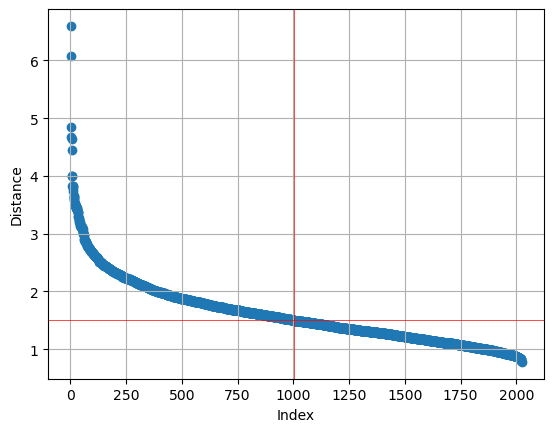

In [49]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 1.5 
min_index = np.argmin(np.abs(f_final - 1.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(visible=True)
plt.show()

In [18]:
#No clear elbow bt could be between 2.7-3.3
#We can explore epsilon values in this range and use the Sihouette score to take the final decission.

In [67]:
np.arange(2.7,2.9,0.01)

array([2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 ,
       2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89])

In [68]:
models = {}

for value in np.arange(2.7,2.9,0.01):
    model = DBSCAN(eps=value, min_samples=18) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(song_features_scaled)
    score =  round(silhouette_score(song_features_scaled, model.fit_predict(song_features_scaled)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}
    filename = "models/model_" + str(round(value,2)) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(model,file)


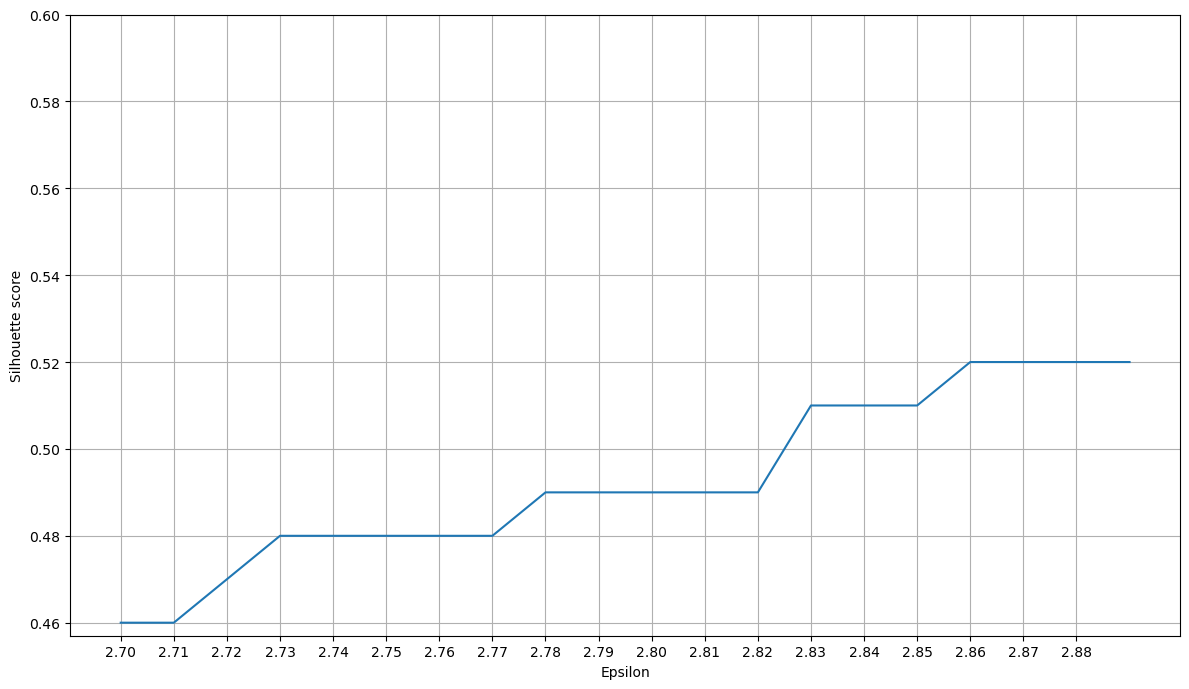

In [70]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(2.7,2.9,0.01)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#We are looking for the epsilon value which give us the models with the highest Silhouette score. 
#In the previous figure it can be seen that the maximum of the curve is located for epsilon values >= 2.86. 
#Therefore, we could set epsilon=2.86

In [71]:
model_2 = DBSCAN(eps=2.86, min_samples=18)
#Fit new model and get yhat values
yhat_2 = model_2.fit_predict(song_features_scaled)

#Print the clusters
clusters_2 = np.unique(yhat_2)
clusters_2

array([-1,  0])